In [27]:
# !pip install yfinance

In [28]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol for Twilio
ticker_symbol = "TWLO"

# Download the data using yfinance
data = yf.download(ticker_symbol, period="5y", interval="1d")  # Example: last month, daily data

# Select the 'Close' and 'Volume' columns, and reset index for 'Time'
data = data[['Close', 'Volume']].reset_index()

# # Rename columns for clarity (optional)
# data.rename(columns={'Date': 'Time'}, inplace=True)

# Display the resulting DataFrame
display(data)
price_df = data

[*********************100%***********************]  1 of 1 completed


Price                       Date       Close   Volume
Ticker                                  TWLO     TWLO
0      2019-11-29 00:00:00+00:00  103.279999  1132200
1      2019-12-02 00:00:00+00:00   97.650002  5268200
2      2019-12-03 00:00:00+00:00   99.279999  2659500
3      2019-12-04 00:00:00+00:00   98.930000  2363900
4      2019-12-05 00:00:00+00:00   97.540001  1610000
...                          ...         ...      ...
1253   2024-11-21 00:00:00+00:00  102.070000  4216400
1254   2024-11-22 00:00:00+00:00  104.349998  2504200
1255   2024-11-25 00:00:00+00:00  105.410004  5962900
1256   2024-11-26 00:00:00+00:00  104.410004  1761900
1257   2024-11-27 00:00:00+00:00  102.910004  1397000

[1258 rows x 3 columns]

In [29]:

from random import seed

seed(42)
price_df.head()

Price                       Date       Close   Volume
Ticker                                  TWLO     TWLO
0      2019-11-29 00:00:00+00:00  103.279999  1132200
1      2019-12-02 00:00:00+00:00   97.650002  5268200
2      2019-12-03 00:00:00+00:00   99.279999  2659500
3      2019-12-04 00:00:00+00:00   98.930000  2363900
4      2019-12-05 00:00:00+00:00   97.540001  1610000

In [30]:
price_df.index = pd.to_datetime(price_df['Date'])  #  A
price_df.index = price_df.index.tz_convert('US/Pacific')  # A

price_df.sort_index(inplace=True)  # B

del price_df['Date']  # C

# A Set our index to be the date column
# B Sort our dataframe by the index (time)
# C Delete the date column because it is now our index

In [31]:
price_df.head()

Price                           Close   Volume
Ticker                           TWLO     TWLO
Date                                          
2019-11-28 16:00:00-08:00  103.279999  1132200
2019-12-01 16:00:00-08:00   97.650002  5268200
2019-12-02 16:00:00-08:00   99.279999  2659500
2019-12-03 16:00:00-08:00   98.930000  2363900
2019-12-04 16:00:00-08:00   97.540001  1610000

<Axes: xlabel='Date'>

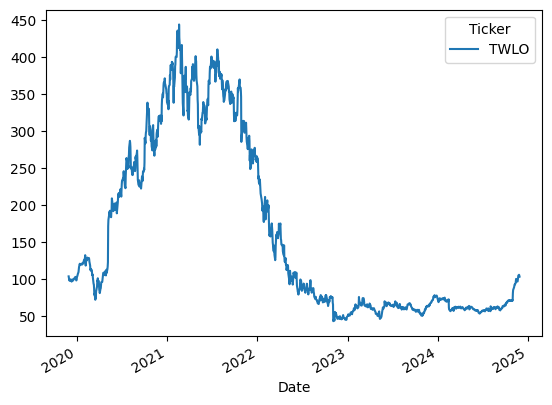

In [32]:
price_df['Close'].plot()


In [33]:
last_price_of_the_day = price_df.groupby(price_df.index.date).tail(1)['Close'].rename('day_close_price')  # A
last_price_of_the_day.index = last_price_of_the_day.index.date  # A

price_df['day'] = price_df.index.date  # B

price_df = price_df.merge(last_price_of_the_day, left_on='day', right_index=True)  # C

price_df['pct_change_eod'] = (price_df['day_close_price'] - price_df['Close']) / price_df['Close']   # D

price_df['stock_price_rose'] = price_df['pct_change_eod'] > 0  # E

price_df.head()


# A calculate the ending price of TWLO for each day
# B Add a column to our price dataframe to represent the date
# C Merge the ending prices into our granular dataframe
# D the percent change from now until the end of the day
# E Create our response column: a binary response

TypeError: 'str' object is not callable

## Date/time related features


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Datetime features

price_df['feature__dayofweek'] = price_df.index.dayofweek  # A
price_df['feature__morning'] = price_df.index.hour < 12  # B

# A An ordinal feature representing the day of the week
# B A binary feature for whether it is before noon or not

price_df['feature__dayofweek'].value_counts().sort_index().plot(kind='bar', title='Day of the Week Count')
plt.xlabel('Day of the Week')


In [ ]:
price_df['feature__morning'].value_counts().plot(kind='bar', title='Is Morning Counts')
plt.xlabel('Is Morning')


## Lag / Rolling Window features

In [ ]:
price_df['feature__lag_30_min_ago_price'] = price_df['close'].shift(30, freq='T')
price_df['feature__lag_7_day_ago_price'] = price_df['close'].shift(7, freq='D')

price_df['feature__lag_7_day_ago_price'].plot(figsize=(20,10), title='Close vs Lag Close')
price_df['close'].plot()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')


In [ ]:
price_df['feature__rolling_close_mean_60'] = price_df['close'].rolling('60min').mean()

price_df['feature__rolling_close_mean_60'].plot(figsize=(20, 10), title='Rolling 60min Close')

plt.xlabel('Time')
plt.ylabel('Price')


In [ ]:
# Exercise 7.1 Calculate the rolling 2 and a half hour average closing price and plot that value over the
# entirety of the training set.


price_df['feature__rolling_close_mean_150'] = price_df['close'].rolling('150min').mean()

price_df['feature__rolling_close_mean_150'].plot(figsize=(20, 10), title='Rolling 150min Close')

plt.xlabel('Time')
plt.ylabel('Price')

del price_df['feature__rolling_close_mean_150']


In [ ]:
price_df['feature__rolling_close_mean_60'] = price_df['close'].rolling('60min').mean() # A
price_df['feature__rolling_close_std_60'] = price_df['close'].rolling('60min').std() # B
price_df['feature__rolling_volume_mean_60'] = price_df['volume'].rolling('60min').mean() # C
price_df['feature__rolling_volume_std_60'] = price_df['volume'].rolling('60min').std() # D

price_df.dropna(inplace=True)

price_df['feature__rolling_close_mean_60'].plot(figsize=(20, 10), title='Rolling 60min Close')
plt.xlabel('Time')
plt.ylabel('Price')

# A Rolling 60-minute average price
# B Rolling 60-minute standard deviation of price
# C Rolling 60-minute average volume
# D Rolling 60-minute standard deviation of volume


## Expanding Window features

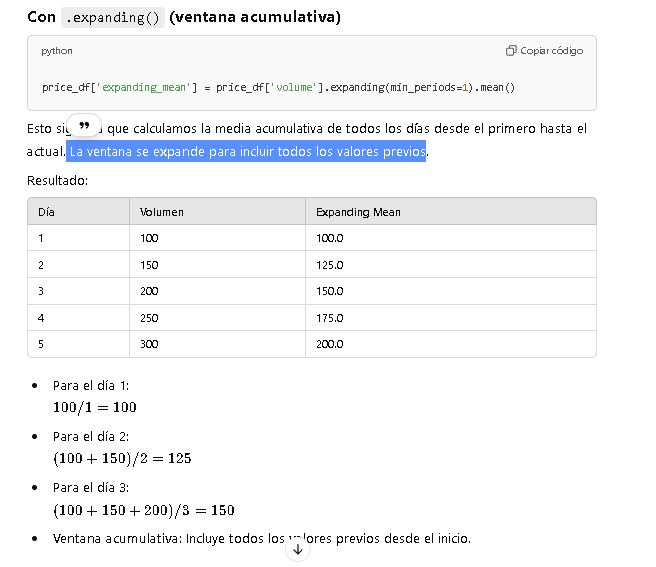

In [ ]:
price_df['feature__expanding_close_mean'] = price_df['close'].expanding(200).mean()
price_df['feature__expanding_volume_mean'] = price_df['volume'].expanding(200).mean()

price_df.dropna(inplace=True)

In [ ]:
price_df['feature__expanding_close_mean'].plot(figsize=(20, 10), title='Expanding Window Close')

plt.xlabel('Time')
plt.ylabel('Price')


In [ ]:
price_df['feature__expanding_volume_mean'].plot(figsize=(20, 10), title='Expanding Window Volume')  # A

plt.xlabel('Time')
plt.ylabel('Shares')

# A plot our expanding window features

In [ ]:
%run ./Base.ipynb

In [ ]:
from sklearn.pipeline import Pipeline  # A
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf = RandomForestClassifier(random_state=0)

ml_pipeline = Pipeline([  # B
    ('scale', StandardScaler()),
    ('classifier', clf)
])

params = {  # C
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_split': [2, 3, 5],

    'classifier__max_depth': [10, None],
    'classifier__max_features': [None, 'auto']
}

# A Import the scikit-learn Pipeline object
# B Create a pipeline with feature scaling and our classifier
# C Create the base gridsearch parameters



In [ ]:
from sklearn.model_selection import TimeSeriesSplit  # A

tscv = TimeSeriesSplit(n_splits=2)  # A

# A This splitter will give us train/test splits optimized for time data


In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(price_df)):
    train_times, test_times = price_df.iloc[train_index].index, price_df.iloc[test_index].index
    print(f'Iteration {i}\n-------------')
    print(f'''Training between {train_times.min().date()} and {train_times.max().date()}. Testing between {test_times.min().date()} and {test_times.max().date()}\n'''
    )


In [ ]:
price_df.filter(regex='feature__').corrwith(price_df['stock_price_rose']).sort_values()

In [ ]:
def split_data(price_df):
    ''' This function takes in our price dataframe and splits it into a training and validation set
    as well as filtering our rows to only use rows that are on the hour
    '''
    downsized_price_df = price_df[(price_df.index.minute == 0)]  # A
    train_df, test_df = downsized_price_df[:'2021-05-31'], downsized_price_df['2021-06-01':]  # B
    train_X, test_X = train_df.filter(regex='feature'), test_df.filter(regex='feature')  # C
    train_y, test_y = train_df['stock_price_rose'], test_df['stock_price_rose'] # D
    return train_df, test_df, train_X, train_y, test_X, test_y

# A limit our data to only make trades at the 0 minute mark. Usually 6-7 times a day
# B Split our dataframe into training and validation (before and after June 2021)
# C Use the pandas filter method to select the features based on the prefix feature__ we have been adding
# D Split our target variable based on our June 2021 split


In [ ]:
train_df, test_df, train_X, train_y, test_X, test_y = split_data(price_df)

print("Date-time/Lag/Window/Rolling features + Random Forest\n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params,
    cv=tscv, include_probas=True  # C
)


In [ ]:
def plot_gains(df, response, predictions):
    ''' A simulation of acting on the First prediction of the day '''
    df['predictions'] =  predictions
    df['movement_correct_multiplier'] = (predictions == response).map({True: 1, False: -1})
    df['gain'] = df['movement_correct_multiplier'] * df['pct_change_eod'].abs()


    bullish = df[predictions == True]
    bullish_gains = bullish.sort_index().groupby(bullish.index.date).head(1)['gain']
    bullish_gains.cumsum().plot(label='Bullish Only', legend=True)
    print(f'% of time with profit: {(bullish_gains.cumsum() > 0).mean():.3f}')
    print(f'Total Gains for bullish is {bullish_gains.sum():.3f}')

    bearish = df[predictions == False]
    bearish_gains = bearish.sort_index().groupby(bearish.index.date).head(1)['gain']
    bearish_gains.cumsum().plot(label='Bearish Only', legend=True)
    print(f'% of time with profit: {(bearish_gains.cumsum() > 0).mean():.3f}')
    print(f'Total Gains for bearish is {bearish_gains.sum():.3f}')

    gains = df.sort_index().groupby(df.index.date).head(1)['gain']
    gains.cumsum().plot(label='All Predictions', legend=True)
    print(f'% of time with profit: {(gains.cumsum() > 0).mean():.3f}')
    print(f'Total Gains for all predictions is {gains.sum():.3f}')

    plt.title('Gains')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Gains')



In [ ]:
plot_gains(test_df.copy(), test_y, test_preds)


In [ ]:
test_y.value_counts(normalize=True)  # A

# A Guessing bearish has a null accuracy of just over 51%

## Domain Features

In [ ]:
daily_features = pd.DataFrame()  # A

daily_features['first_5_min_avg_close'] = price_df.groupby(
    price_df.index.date
)['close'].apply(lambda x: x.head().mean())  #  B
daily_features['last_5_min_avg_close'] = price_df.groupby(
    price_df.index.date
)['close'].apply(lambda x: x.tail().mean())  # B


daily_features['feature__overnight_change_close'] = \
    (daily_features['first_5_min_avg_close'] - daily_features['last_5_min_avg_close'].shift(1)) / daily_features['last_5_min_avg_close'].shift(1)  # C
daily_features['feature__monthly_pct_change_close'] = daily_features['first_5_min_avg_close'].pct_change(periods=31)  # D
daily_features['feature__expanding_average_close'] = daily_features['first_5_min_avg_close'].expanding(31).mean()  # E

# A Make a dataframe to hold stats about the day itself
# B Average the first and last 5 minutes of the day to get an opening and closing price
# C The overnight change (pct change from the  previous closing price to the current opening price)
# D A rolling percent change of opening price (window  of 31 datapoints)
# E An expanding window function of average opening price (omitting the first 31 datapoints for stability)



## MACD

In [ ]:
def macd(ticker):  # A
    exp1 = ticker.ewm(span=12, adjust=False).mean()
    exp2 = ticker.ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    return macd.ewm(span=9, adjust=False).mean()

daily_features['feature__macd'] = macd(daily_features['first_5_min_avg_close'])  # B

price_df = price_df.merge(daily_features, left_on=price_df.index.date, right_index=True)  # C
price_df.dropna(inplace=True)

# A function to calculate macd
# B calculate macd using the opening prices
# C Merge the daily features into the main price Dataframe

In [ ]:
price_df.describe()

In [ ]:
tweet_df = pd.read_csv(f"../data/twlo_tweets.csv", encoding='ISO-8859-1')

tweet_df.index = pd.to_datetime(tweet_df['date_tweeted'])
tweet_df.index = tweet_df.index.tz_convert('US/Pacific')
del tweet_df['date_tweeted']

tweet_df.sort_index(inplace=True)
tweet_df.dropna(inplace=True)

tweet_df = tweet_df['2019-12-01':'2021-07-08']


tweet_df.head()

In [ ]:
rolling_1_day_verified_count = tweet_df.resample('1T')['author_verified'].sum().rolling('1D').sum()

rolling_1_day_verified_count.plot(title='Daily Rolling Count of Verified Tweets')
plt.xlabel('Time')
plt.ylabel('Number of Verified Tweets')


In [ ]:
rolling_7_day_total_tweets = tweet_df.resample('1T')['tweet_unique_id'].count().rolling('7D').sum()

rolling_7_day_total_tweets.plot(title='Weekly Rolling Count of Tweets')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')


In [ ]:
twitter_stats = pd.DataFrame({
    'feature__rolling_7_day_total_tweets': rolling_7_day_total_tweets,
    'feature__rolling_1_day_verified_count': rolling_1_day_verified_count
})  # A

twitter_stats.index = pd.to_datetime(twitter_stats.index)  # B
twitter_stats.index = twitter_stats.index.tz_convert('US/Pacific')  # B

price_df = price_df.merge(twitter_stats, left_index=True, right_index=True)  # C

# A Create a dataframe with the twitter stats
# B Standardize the index to make the following merge easier
# C Merge twitter stats into our price dataframe

In [ ]:
#Exercise 7.2

price_df.filter(
    regex='feature__'
).corrwith(
    price_df['stock_price_rose']
).sort_values()

In [ ]:
train_df, test_df, train_X, train_y, test_X, test_y = split_data(price_df)

print("Add Domain Features\n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params,
    cv=tscv, include_probas=True  # C
)

plot_gains(test_df.copy(), test_y, test_preds)

# A new features in price_df require a new split

In [ ]:
price_df.to_csv('fifteen_percent_gains_features.csv', index=False)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators=20, max_depth=None, random_state=0)  # A
lr = LogisticRegression(random_state=0)

ml_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('select_from_model', SelectFromModel(estimator=rf)),
    ('classifier', clf)
])

params.update({
    'select_from_model__threshold': [
        '0.5 * mean', 'mean', '0.5 * median', 'median'
    ],
    'select_from_model__estimator':  [rf, lr]
})

print("Feature Selection (SFM) \n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params,
    cv=tscv, include_probas=True  # C
)

del params['select_from_model__threshold']
del params['select_from_model__estimator']

plot_gains(test_df.copy(), test_y, test_preds)

# The feature importances in this random forest will dictate which features to select

In [ ]:
train_X.shape

In [ ]:
from sklearn.feature_selection import RFE

ml_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('rfe', RFE(estimator=rf)),  # A
    ('classifier', clf)
])

params.update({
    'rfe__n_features_to_select': [0.6, 0.7, 0.8, 0.9],
    'rfe__estimator':  [rf, lr]
})

print("Feature Selection (RFE) \n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params,
    cv=tscv, include_probas=True  # C
)
del params['rfe__n_features_to_select']
del params['rfe__estimator']

plot_gains(test_df.copy(), test_y, test_preds)


In [ ]:
list(zip(train_df.filter(regex='feature__').columns, best_model.named_steps['rfe'].ranking_))  # A

# A get the ranking of features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(3)
small_poly_features = p.fit_transform(
    price_df[['feature__rolling_close_mean_60',
    'feature__rolling_7_day_total_tweets',
    'feature__morning']])

pd.DataFrame(small_poly_features, columns=p.get_feature_names())


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

ml_pipeline = Pipeline([
    ('poly', PolynomialFeatures(1, include_bias=False)),
    ('scale', StandardScaler()),
    ('select_from_model', SelectFromModel(estimator=rf)),  # A
    ('classifier', clf)
])

params.update({
    'select_from_model__threshold': ['0.5 * mean', 'mean', '0.5 * median', 'median'],
    'select_from_model__estimator':  [rf, lr],
    'poly__degree': [2],
})

print("Polynomial Features \n==========================")
best_model, test_preds, test_probas = advanced_grid_search(
    train_X, train_y,
    test_X, test_y,
    ml_pipeline, params,
    cv=tscv, include_probas=True  # C
)

del params['poly__degree']
del params['select_from_model__threshold']
del params['select_from_model__estimator']

plot_gains(test_df.copy(), test_y, test_preds)


In [ ]:
print(best_model)